Possum Regressionデータセットを使用

https://www.kaggle.com/datasets/abrambeyer/openintro-possum/data

hdlngth（頭の長さ）からtaill（しっぽの長さ）を予測

In [67]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

データセットを読み込む

In [68]:
possum_df = pd.read_csv('possum.csv')
possum_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [69]:
# hdlngth（頭の長さ）からtaill（しっぽの長さ）の列のみ使用
possum_df = possum_df[['hdlngth', 'taill']]
possum_df.head()

,hdlngth,taill
0,94.1,36.0
1,92.5,36.5
2,94.0,39.0
3,93.2,38.0
4,91.5,36.0


In [70]:
x = possum_df[['hdlngth']] # 説明変数，[[]]でDataFrame型になる
y = possum_df[['taill']] # 目的変数

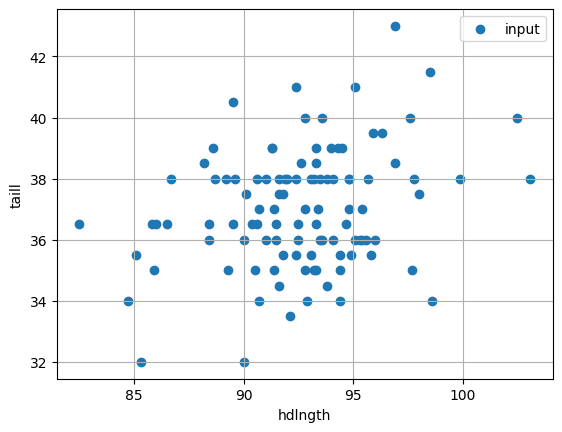

In [71]:
# データの可視化

#データプロット
plt.scatter(x, y,label='input')

plt.xlabel('hdlngth')
plt.ylabel('taill')
plt.legend(loc='best')
plt.grid(True) 

重回帰の関数を定義

In [87]:
# 正則化最小二乗法で解を求める rmls(学習データ(x), 学習データ(y), 解空間の次元数N, 正規化定数ξ)
def rmls(x_train, y_train, N, gzai ):
    
    # x_train と y_train を NumPy 配列に変換
    x_train = x_train.values if hasattr(x_train, 'values') else x_train
    y_train = y_train.values if hasattr(y_train, 'values') else y_train
    
    #行列Hの行数設定
    M=x_train.shape[0]

    #xとyをM行1列に変換
    x_train=x_train.reshape((M,1))
    y_train=y_train.reshape((M,1))

    #全ての要素が1の列ベクトルを生成
    i=np.ones((M,1))

    H=i
    for k in range(1,N):
        H=np.hstack((H,x_train**k))
    #print('H =', H)
    
    A=np.dot(H.T, H)+gzai*np.eye(N)
    B=np.dot(H.T, y_train)

    #パラメータΘの最小二乗推定値
    lss_c=np.dot(np.linalg.inv(A), B)

    #lss_cの要素を逆順に並び替え
    lss_c=np.sort(lss_c)[::-1]

    return (lss_c, M)

In [135]:
# 次元数
N=8
# 正規化定数
gzai=0.1

In [136]:
lss_c, M = rmls(x, y, N, gzai)

In [137]:
lss_c

array([[-3.312e-10],
       [ 1.339e-07],
       [-2.107e-05],
       [ 1.596e-03],
       [-5.717e-02],
       [ 7.535e-01],
       [ 4.843e-02],
       [ 2.923e-02]])

In [138]:
M

104

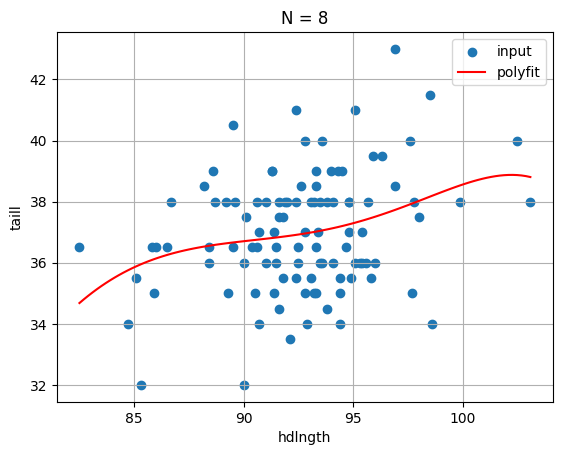

In [139]:
#データプロット
plt.scatter(x, y,label='input')

#多項式近似曲線のプロット
xs = np.linspace(np.min(x),np.max(x),M)
ys = np.polyval(lss_c,xs)
plt.plot(xs, ys, label='polyfit', color='red')

#結果の表示
plt.title('N = %d' % (N))
plt.xlabel('hdlngth')
plt.ylabel('taill')
plt.legend(loc='best')
plt.grid(True) 